#### Data Description :
The Haberman's survival dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

#### Attribute Information:

* Age of patient at time of operation (numerical)
* Patient's year of operation (year - 1900, numerical)
* Number of positive axillary nodes detected (numerical)
* Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("haberman.csv")
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [3]:
df.columns = ["age","year_of_treatment","positive_lymph_nodes","survival_status_after_5_years"]

In [6]:
df.sample(5)

,age,year_of_treatment,positive_lymph_nodes,survival_status_after_5_years
59,42,65,0,1
98,47,61,0,1
152,52,64,0,1
120,49,63,3,1
55,42,60,1,1


In [7]:
# Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            305 non-null    int64
 1   year_of_treatment              305 non-null    int64
 2   positive_lymph_nodes           305 non-null    int64
 3   survival_status_after_5_years  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


#### Observations - 

* There are no missing values in this dataset.

In [8]:
# Shape - Rows and Columns

df.shape

(305, 4)

In [9]:
# Description - Statistical summary

df.describe()

,age,year_of_treatment,positive_lymph_nodes,survival_status_after_5_years
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [13]:
df.survival_status_after_5_years.value_counts()

1    224
2     81
Name: survival_status_after_5_years, dtype: int64

In [14]:
# Mapping 1:"yes" and 2:"no" for column survival_status_after_5_years

df.survival_status_after_5_years = df.survival_status_after_5_years.map({1:"yes", 2:"no"})

In [15]:
df.survival_status_after_5_years.value_counts()

yes    224
no      81
Name: survival_status_after_5_years, dtype: int64

In [16]:
# Changing the data type to categorical

df.survival_status_after_5_years = df.survival_status_after_5_years.astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   age                            305 non-null    int64   
 1   year_of_treatment              305 non-null    int64   
 2   positive_lymph_nodes           305 non-null    int64   
 3   survival_status_after_5_years  305 non-null    category
dtypes: category(1), int64(3)
memory usage: 7.7 KB


In [18]:
# Target variable distribution

100*df.survival_status_after_5_years.value_counts(normalize=True)

yes    73.442623
no     26.557377
Name: survival_status_after_5_years, dtype: float64

#### Observations - 

* The age of the patients vary from 30 to 83 with the median of 52.
* Although the maximum number of positive lymph nodes observed is 52, nearly 75% of the patients have less than 5 positive lymph nodes and nearly 25% of the patients have no positive lymph nodes
* The target column is imbalanced with 73% of values are 'yes'

### Univariate Analysis

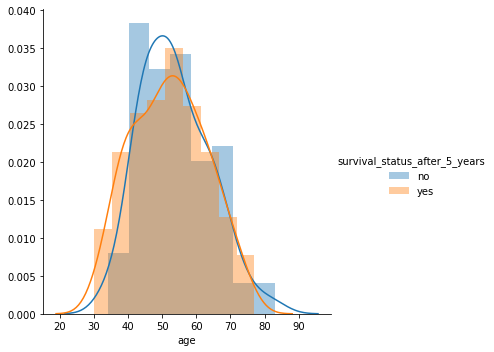

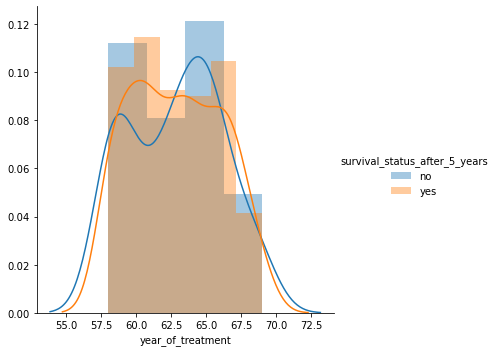

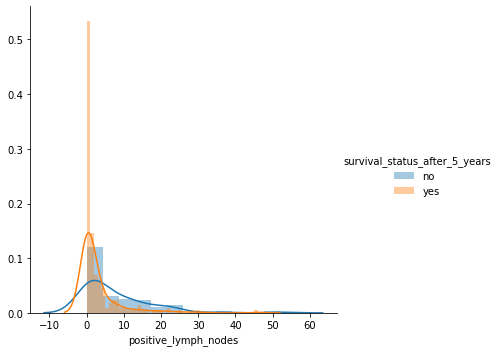

In [23]:
for idx, feature in enumerate(list(df.columns)[:-1]):
    fg = sns.FacetGrid(df, hue='survival_status_after_5_years', size=5)
    fg.map(sns.distplot, feature).add_legend()
    plt.show()

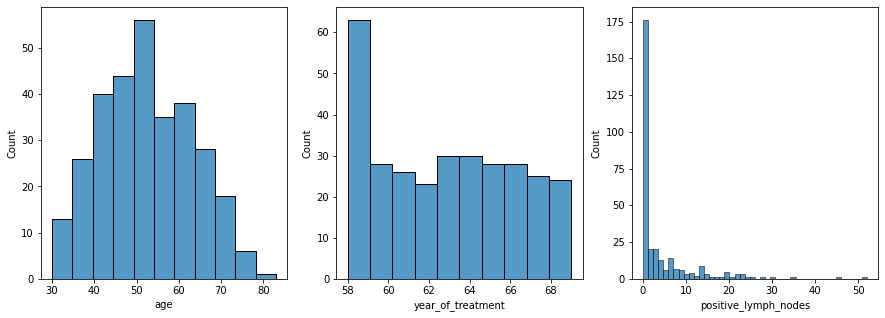

In [42]:
# Histogram

fig, axes = plt.subplots(1,3, figsize=(15,5))

for index, item in enumerate(list(df.columns)[:-1]):
    sns.histplot(x=item, data=df, ax=axes[index])
plt.show()

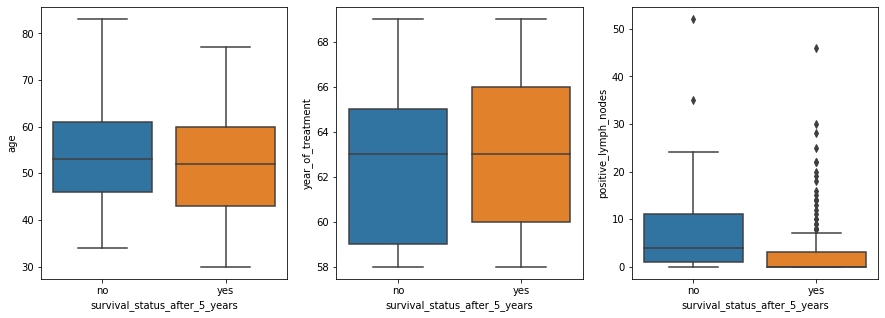

In [28]:
# Box Plot

fig, axes = plt.subplots(1,3, figsize=(15,5))

for index, item in enumerate(list(df.columns)[:-1]):
    sns.boxplot(x="survival_status_after_5_years", y=item, data=df, ax=axes[index])
plt.show()

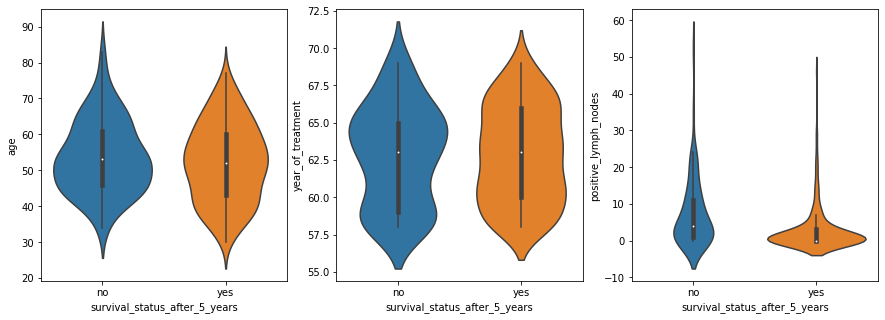

In [30]:
# Violin Plot

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for index, item in enumerate(list(df.columns)[:-1]):
    sns.violinplot(data=df, x="survival_status_after_5_years", y=item, ax=axes[index])
plt.show()

### Multivariate Analysis

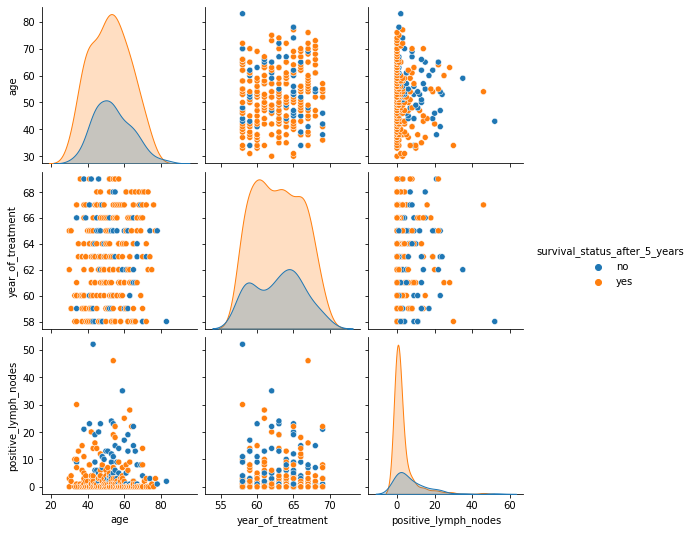

In [32]:
sns.pairplot(df, hue="survival_status_after_5_years")
plt.show()